In [1]:
import torch
import numpy as np


In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_data)
print(f"One Tensor:\n{x_ones}\n")

One Tensor:
tensor([[1, 1],
        [1, 1]])



In [5]:
x_rand= torch.rand_like(x_data,dtype=float)
print(f"Random Tensor:\n {x_rand}\n")

Random Tensor:
 tensor([[0.1765, 0.6685],
        [0.2362, 0.9746]], dtype=torch.float64)



In [6]:
shape = (2,3)
rand_tensor = torch.rand(shape)
zeros_tensor = torch.zeros(shape)
ones_tensor = torch.ones(shape)
print(f"Random Tensor: \n{rand_tensor}\n")
print(f"Ones Tensor: \n{ones_tensor}\n")
print(f"Zeros Tensor: \n{zeros_tensor}")

Random Tensor: 
tensor([[0.7867, 0.2876, 0.4682],
        [0.7653, 0.7833, 0.4125]])

Ones Tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Zeros Tensor: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [8]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [9]:
tensor = tensor.ones(4,4)
print(f"First row:{tensor[0]}")
print(f"First column:"{tensor{0}})

tensor([[0.0732, 0.7643, 0.5451, 0.6055],
        [0.2747, 0.4186, 0.3647, 0.4597],
        [0.8897, 0.0984, 0.4904, 0.4580]])

In [17]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(root = "data",
train=True,
download = True,
transform = ToTensor())

test_data = datasets.FashionMNIST(root = "data",
train=True,
download = True,
transform = ToTensor())

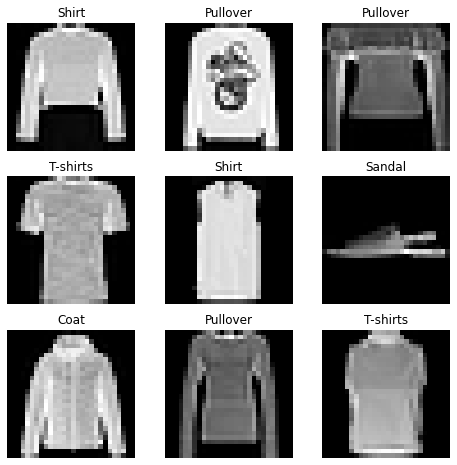

In [18]:
labels_map = {
    0:"T-shirts",
    1:"Trouser",
    2:"Pullover",
    3:"Press",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1,cols*rows+1):
    samples_idx = torch.randint(len(training_data),size=(1,)).item()
    img,label = training_data[samples_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")
plt.show()

In [19]:
import os 
import pandas as pd

from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(traing_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
train_features,train_labels = next(iter(train_dataloader))
print(f"Feature batch shape:"{})